In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
MNIST = np.load('./MNIST_train_100.npz')
print(MNIST.keys())

['train_labels', 'train_images']


In [3]:
MNIST['train_images'].shape

(100, 28, 28)

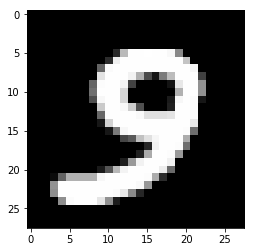

In [8]:
images = MNIST['train_images']
plt.imshow(images[3,:,:],cmap='Greys_r')